<center><h1 style="font-family:algerian;color:blue; font-size:60px"> TP4:Support Vector Machine (svm) </h1></center>

<hr style="border:2px solid gray">

<h2>objectif</h2>
<ul><li>Classificateur de machine à vecteur de support
</li><li>Prise en charge des machines vectorielles et des fonctions du noyau</li></ul>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
seaborn.set()

<center><h1> partie1: Classificateur de machine à vecteur de support </h1></center>


<hr style="border:2px solid">

Les machines à vecteurs de support sont des algorithmes d'apprentissage supervisé très puissants pour les problèmes de classification et de régression. Pour faire simple, ce que SVM linéaire fait est de tracer une ligne entre différents types de "groupes de données" à délimiter, mais il ne suffit pas de tracer une ligne. SVM essaie de trouver la ligne la plus robuste, qu'appelle la ligne la plus robuste ? En fait, c'est la ligne la plus éloignée des 2 types de points d'échantillonnage.

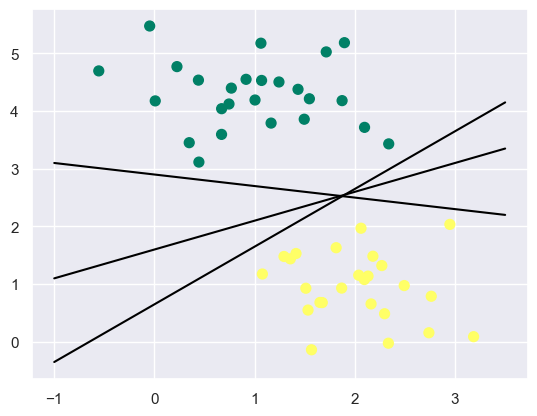

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.6)

L = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')

# En fait, étant donné 3 ensembles de paramètres à volonté, vous pouvez tracer 3 lignes droites différentes
d1=1*L+0.65
d2=0.5*L+1.6
d3=-0.2*L+2.9
#question 1: Tracer les droites de séparation.
plt.plot(L,d1,color="black")
plt.plot(L,d2,color="black")
plt.plot(L,d3,color="black")


Qu'est-ce que vous remarquez ?

<I style="color:red">Pour un problème de classification linéaire, nous supposons que les deux classes sont séparables par un hyperplan</I>

<B>le but de SVM, est d’apprendre à bien placer la frontière entre deux catégories.</B>

In [4]:
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(X, y)

SVC(kernel='linear')

In [5]:
#Les attributs de la methode SVM 
svm.classes_ #Retourne le nom des classes.
svm.coef_#Retourne les paramètres du modèles, seulement pour le kernel linéaire.
svm.dual_coef_#Retourne les coefficients du vecteur de support dans la fonction de décision.
svm.fit_status_#Vous retourne si le modèle a convergé | 0 s'il n'y a pas de problème | 1 s'il y a un problème.
svm.intercept_#Retourne l'ordonnée à l'origine du modèle.
svm.n_features_in_#Retourne le nombre de variables dans le jeu d'entraînement.
svm.support_ #Retourne les indices des vecteurs de support.
svm.support_vectors_#Retourne les vecteurs de support.
svm.n_support_#Retourne le nombre de support.
svm.shape_fit_#Retourne les dimensions du jeu d'entraînement.

(50, 2)

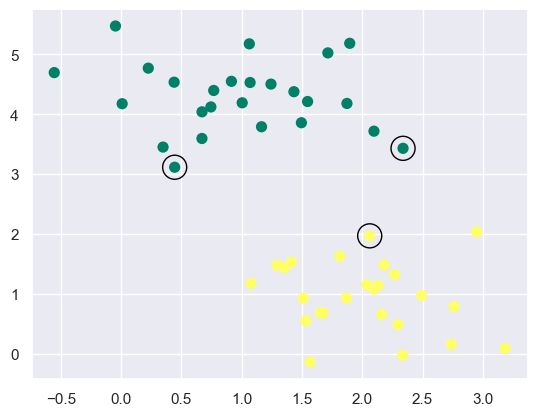

In [6]:
#les points plus proches de la frontière sont appelés vecteurs support.
#question 2: trouver vecteurs support c1:vecteur support classe 1 et c2:vecteur support classe 2
c1=svm.support_vectors_[:,0]
c2=svm.support_vectors_[:,1]

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plt.scatter(c1,c2,s=300,facecolors='none',edgecolors='black')
plt.show()

<center><h1> Représentation des frontières</h1></center>

<hr style="border:2px solid">

<b>SVC intègre une spécificité intéressante, l’objet fournit automatiquement les coefficients de
la droite de séparation lorsque le noyau est linéaire.</b>

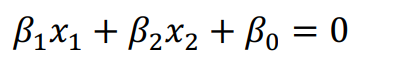

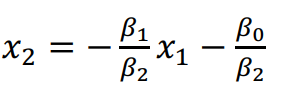

In [7]:
svm.coef_

array([[ 0.22967329, -1.37758262]])

In [8]:
#question 3 : calculer coefficients B1 et B2
B1=svm.coef_[0][0]
B2=svm.coef_[0][1]
#question 4 : calculer la constante B0
B0=svm.intercept_

In [9]:
B0

array([3.18971354])

In [10]:
B1

np.float64(0.22967329367066203)

In [11]:
#coordonnées des points pour tracer les droites frontières 
x1 = np.array([-1,3.6])
#question 5 : tracer les frontières
frontiere = -(B1/B2)*x1-B0/B2
vs1= -(B1/B2)*x1-(B0-1)/B2
vs2= -(B1/B2)*x1-(B0+1)/B2

<function matplotlib.pyplot.show(close=None, block=None)>

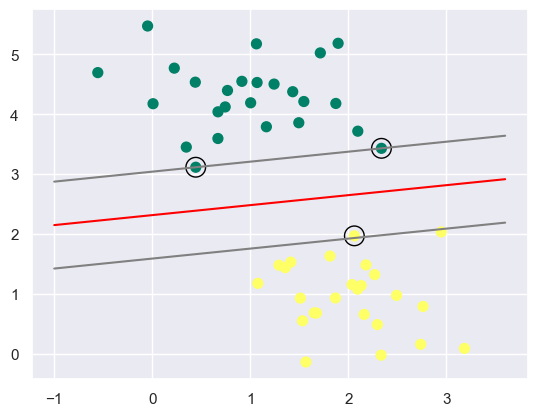

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plt.scatter(c1,c2,s=200,facecolors='none',edgecolors='black')
#question 6 : ajouter les droites frontieres
plt.plot(x1,frontiere,color="red")
plt.plot(x1,vs1,color="gray")
plt.plot(x1,vs2,color="gray")
plt.show

In [13]:
#question 7 : Créer une fonction de prédiction renvoie jaune si y_estimé >0 et verte si non 
def prediction(x):
    y=B1*x[0]+B2*x[1]+B0
    if(y>0):
        return "jaune"
    else:
        return "verre"

  

In [14]:
# question 8: Prédire des nouveaux valeurs ? exemple:[0,4]
prediction([0,5])

'verre'

 <center><h1>partie2 : Systèmes non linéaires :astuce du noyau</h1></center>

<hr style="border:2px solid">

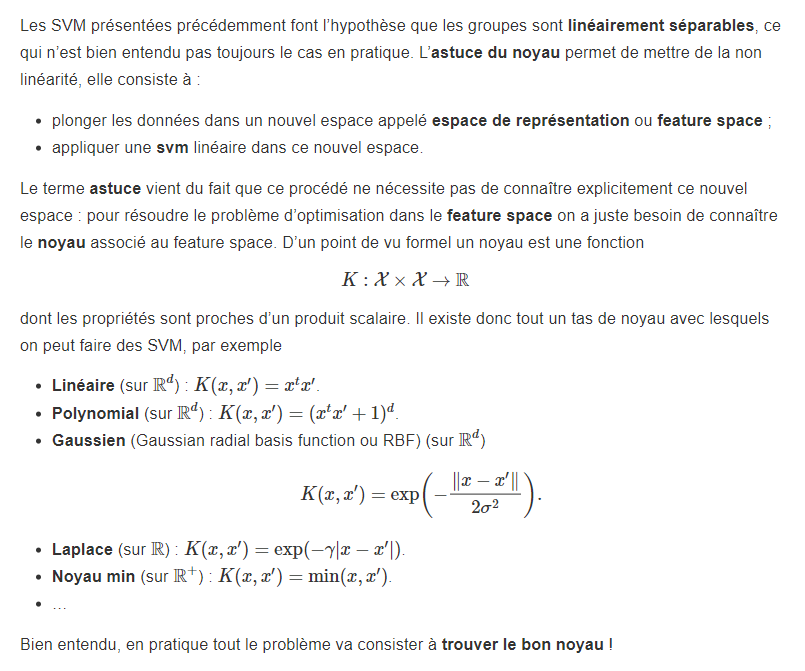

In [15]:
def make_meshgrid(x, y, h=.01):
    xx, yy = np.meshgrid(np.arange(x.min() - 1, x.max() + 1, h),np.arange(y.min() - 1, y.max() + 1, h))
    return xx, yy

In [16]:
def plot_contours(clf, xx, yy, **params):
    xy = std.transform(np.c_[xx.ravel(), yy.ravel()])
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    sortie = plt.contourf(xx, yy, Z, **params)
    return sortie

In [17]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=100, noise=0.1)

In [18]:
x

array([[-0.96286498,  0.16265867],
       [ 1.92160338,  0.36610761],
       [ 1.96093641,  0.08250608],
       [ 1.75568401, -0.39055049],
       [-0.5365554 ,  0.72399281],
       [ 1.81447392, -0.32365952],
       [-0.13813926,  0.3526805 ],
       [ 0.3379599 , -0.31449829],
       [ 0.7134777 ,  0.89020799],
       [ 0.26332906, -0.25254633],
       [-0.11392978,  0.95939535],
       [ 0.25183425, -0.21049343],
       [ 0.92497743,  0.54426703],
       [ 0.99638368,  0.22962095],
       [-0.44605225,  1.11198676],
       [ 2.05220995,  0.39493354],
       [-0.13829024,  0.31518332],
       [ 1.82141603, -0.02928858],
       [-1.04835519,  0.16439881],
       [-0.16802   ,  0.93756837],
       [ 0.99361977,  0.3222728 ],
       [-0.76086687,  0.56072701],
       [ 0.23522296,  0.07523088],
       [ 0.45331427, -0.34814179],
       [ 1.88839607,  0.1061403 ],
       [ 0.39527625, -0.29576309],
       [-0.97085175,  0.22274183],
       [-1.07536666,  0.50622575],
       [-0.76040109,

In [19]:
std = StandardScaler()
x_std = std.fit_transform(x)

NameError: name 'StandardScaler' is not defined

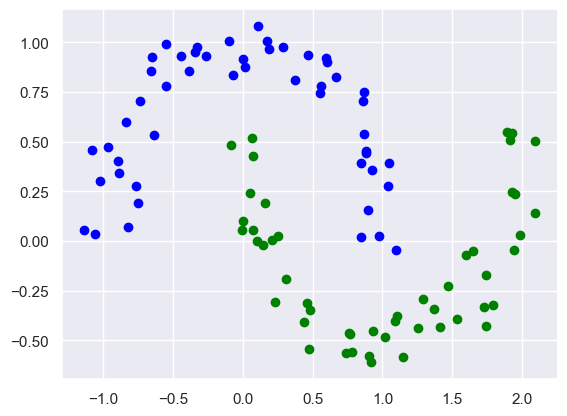

In [292]:
plt.scatter(x[y==0][:,0], x[y==0][:,1], color='blue')
plt.scatter(x[y==1][:,0], x[y==1][:,1], color='green')
plt.show()

In [293]:
#question 9: créer un modele svm avec noyau "gaussien (RBF)"
svm=SVC(kernel="rbf")
#question 10 : Entraîner le modèle 
svm.fit(x,y)

SVC()

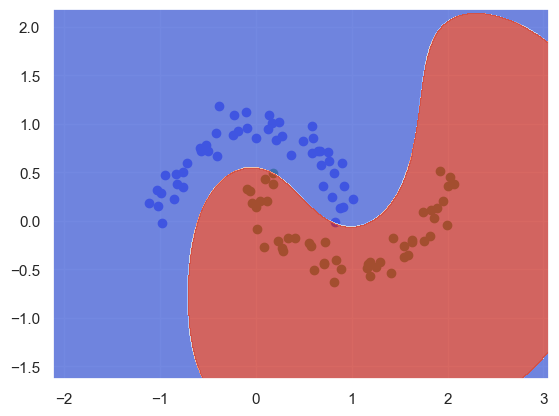

In [167]:
X0, X1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(X0, X1)
plt.scatter(x[y==0][:,0], x[y==0][:,1], color='blue')
plt.scatter(x[y==1][:,0], x[y==1][:,1], color='green')
plot_contours(svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.show()

# Exercice1 

In [299]:
import pandas as pd
dt = pd.read_csv('svm_multi.csv', names=['x1', 'x2', 'y'])
dt.head()

,x1,x2,y
0,1.0,6.0,1
1,1.0,7.0,1
2,2.0,5.0,1
3,2.0,8.0,1
4,4.0,2.0,2


## définissant x et y

In [300]:
x = dt[['x1', 'x2']]

y_1 = dt.y.where(dt.y == 1, other=-1)
y_2 = dt.y.where(dt.y == 2, other=-1)
y_3 = dt.y.where(dt.y == 3, other=-1)
y_4 = dt.y.where(dt.y == 4, other=-1)

In [301]:
data_1 = dt[dt.y == 1]
data_2 = dt[dt.y == 2]
data_3 = dt[dt.y == 3]
data_4 = dt[dt.y == 4]

In [302]:
data_1

,x1,x2,y
0,1.0,6.0,1
1,1.0,7.0,1
2,2.0,5.0,1
3,2.0,8.0,1
23,1.0,4.0,1
24,1.0,5.0,1
25,1.0,8.0,1
26,1.0,9.0,1
27,2.0,9.0,1
28,2.0,6.0,1


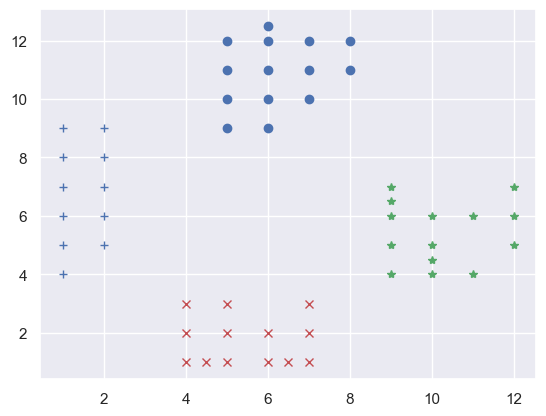

In [303]:
plt.plot(data_1.x1, data_1.x2, 'b+', label='Class 1')
plt.plot(data_2.x1, data_2.x2, 'rx', label='Class 2')
plt.plot(data_3.x1, data_3.x2, 'g*', label='Class 3')
plt.plot(data_4.x1, data_4.x2, 'o', label='Class 4')

In [304]:
#question 11: créer un modele svm avec noyau "linear avec c=1000"
svm=SVC(kernel="linear",C=1000)
#question 12 : Entraîner le modèle (x,y_1)
svm.fit(x,y_1)

SVC(C=1000, kernel='linear')

In [306]:
# question 13 : calculer W 
w=svm.coef_[0]
#question 14 : calculer la constante b
b=svm.intercept_[0]

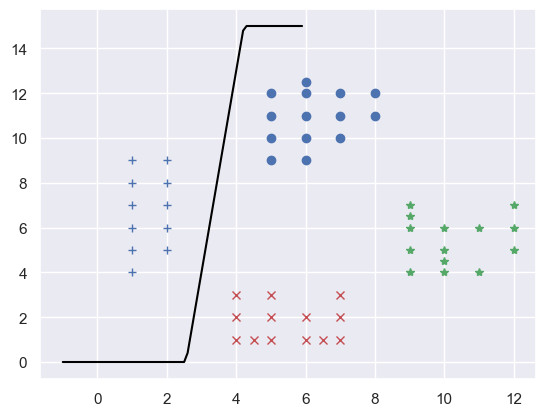

In [312]:
Line=np.linspace(0,12)
#question 15 : tracer les frontières
h1=-(w[0]/w[1])*line-b/w[1]
plt.plot(data_1.x1, data_1.x2, 'b+', label='Class 1')
plt.plot(data_2.x1, data_2.x2, 'rx', label='Class 2')
plt.plot(data_3.x1, data_3.x2, 'g*', label='Class 3')
plt.plot(data_4.x1, data_4.x2, 'o', label='Class 4')
for c in range(len(h1)):
        if h1[c] < 0:
            h1[c] = 0
        elif h1[c] > 15:
            h1[c] = 15
plt.plot(line,h1,color="black")

Refaire les mêmes étapes pour target y_2,y_3,y_4

Qu'est-ce que vous remarquez ?

# Les hyperparamètres


<h1>c</h1>

*C* est une valeur positive qui permet de régulariser le modèle.
Plus la valeur de *c* est grande, plus le modèle privilégiera la baisse de l'erreur.
Plus la valeur de *c* est petite, plus le modèle privilégiera la baisse des paramètres.

**Conseil :** Challengez la valeur de cet hyperparamètre pour rendre votre modèle plus généralisable.

# kernel

L'hyperparamètre kernel vous permet d'utiliser des noyaux pour résoudre des problèmes non linéaires. 

**Conseil :** On ne sait pas quel noyau performe le mieux à l'avance, je vous conseille de tous les tester. 

In [ ]:
svm = SVC(kernel='linear')#Pas de noyau

In [ ]:
svm = SVC(kernel='rbf')#Noyau gaussien ou RBF

In [ ]:
svm = SVC(kernel='poly')#Noyau polynomial

In [ ]:
svm = SVC(kernel='sigmoid')#Noyau sigmoïd

# degree

*Degree* initialise le degrée du kernel polynomial. 
Cet hyperparamètre n'a pas d'incidence sur les autres noyaux. 

**Conseil :** Challengez le paramètre seulement si vous utilisez le noyau polynomial.

# gamma

*Gamma* définit la portée de l'influence des exemples sur le modèle.

Plus la valeur de *gamma* sera faible plus les exemples éloignés seront pris en compte. 
Plus la valeur de *gamma* est élevée plus ce seront les exemples proches qui seront pris en compte.

**Conseil :** Si la valeur de *gamma* est trop élevée vous risquez le sur-apprentissage. 

# coef0

Coef0 initialise les constantes des noyaux polynomial et sigmoid.

Conseil : Challengez seulement si vous utilisez le noyau polynomial ou sigmoid.

# class_weight

Cet hyperparamètre propose de corriger la répartition inégale entre classes par rapport à la fonction de coût.

**Conseil :** Changez seulement en cas de d'une répartition inégale entre les classes

<hr style="border:2px solid red">

# Exercice  à faire

In [315]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
data = datasets.load_wine()

In [316]:
#nous allons essayer de l’explorer et le visualiser afin d’avoir le maximum d’informations pour notre modélisation
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [317]:
#afficher les features(.feature_names)
print(data.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [318]:
#afficher les label (.target_names)
print(data.target_names)

['class_0' 'class_1' 'class_2']


In [319]:
#On voit donc qu’on a 3 labels ce qui pourrait dire qu’on a affaire à différentes catégories de vin. 
#transformons tout ça en un dataFrame Pandas.
dataframe = pd.DataFrame(data=data['data'],columns=data['feature_names'])
#On ajoute la colonne target ensuite
dataframe['target'] = data['target']
# Puis le nom des targets
dataframe['class']=dataframe['target'].map(lambda target_name: data['target_names'][target_name])


In [320]:
dataframe.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

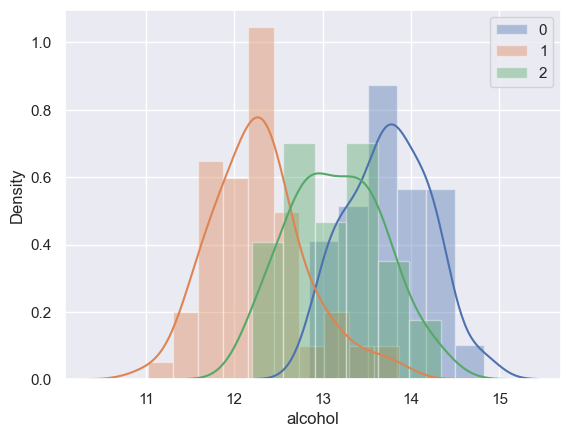

In [321]:
for i in dataframe.target.unique():
    sns.distplot(dataframe['alcohol'][dataframe.target==i],
                 kde=1,label='{}'.format(i))
 
plt.legend()

les distributions semblent plutôt normales et peuvent être classées en 3 groupes. Les vins faibles en teneur d’alcool, les vins à teneur d’alcool moyenne et les vins forts. On peut s’amuser à analyser d’autres caractéristiques, mais notre objectif dans ce tutoriel est de montrer l’utilisation du SVM.

# Création de notre modèle SVM

In [323]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test =train_test_split(data['data'],data['target'],test_size=0.2)

Nous pouvons dès à présent créer notre SVM dans sklearn cela consiste à créer un objet SVC (support vector classificator). L’un des paramètres importants est le noyau ‘kernel’, comme présenté plus haut, c’est une fonction qui sert à transformer les données dans une représentation spécifique.

In [324]:
#créer un modele svm avec noyau "linear"
from sklearn.svm import SVC
svm=SVC(kernel="linear",random_state=0)
#Entraîner le modèle 
svm.fit(X_train,y_train)
#Prediction sur le Test set
y_pred = svm.predict(X_test)

In [325]:
from sklearn.metrics import classification_report
#Présenter es résultats.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        11

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



<hr style="border:2px solid red">

 <center><h1>partie3 : Le Support Vector Machine avec sklearn pour la régression</h1></center>

<hr style="border:2px solid">

In [313]:
x = 9 * np.random.rand(120, 1) - 3
y = 0.5 * x[:, 0]**2 + x[:, 0] + 2 + np.random.randn(120)

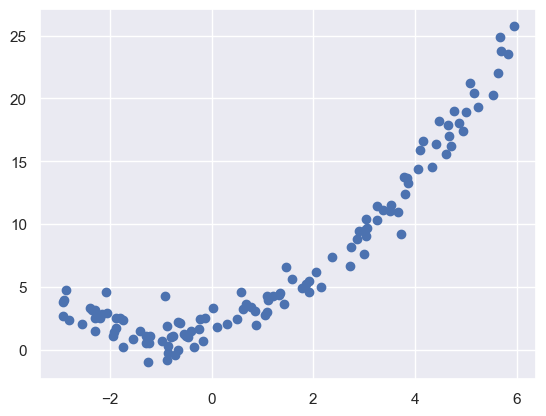

In [314]:
plt.scatter(x,y)
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)

In [13]:
from sklearn.svm import SVR,SVC
svm = SVR(kernel='rbf').fit(x_std,y)

<function matplotlib.pyplot.show(close=None, block=None)>

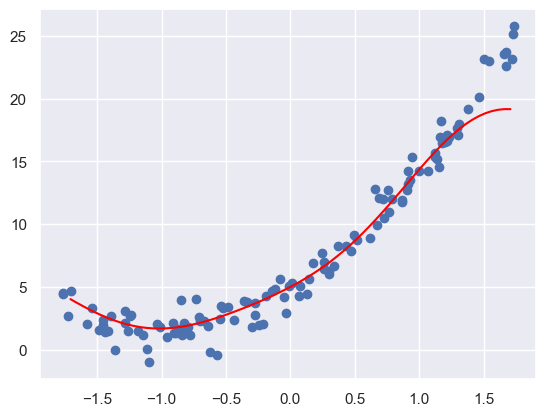

In [14]:
line=np.array(np.arange(-1, 6, 0.1)).reshape(70,1)
line_std=StandardScaler().fit_transform(line)
y_pred=svm.predict(line_std)
plt.plot(line_std,y_pred,color="red")
plt.scatter(x_std,y)
plt.show

<center><h1>Quelques conseils supplémentaires sur les SVM :</h1></center>

<ol><li>Débarrassez-vous de la sélection de fonction du noyau dont nous parlons, lorsque vous utilisez SVM, vous devez faire attention aux réglages de paramètres appropriés, tels que c et gamma dans sklearn. Vous pouvez utiliser la validation croisée pour sélectionner les paramètres les plus performants sur l'ensemble de validation croisée.</li><li>Malheureusement, SVM a une complexité temporelle O (n ^ 3). Dans sklearn, LinearSVC est évolutif (c'est-à-dire qu'il peut bien prendre en charge des données massives), et SVC est un peu gênant pour des ensembles de données particulièrement volumineux. Cependant, pour un ensemble de données particulièrement volumineux, vous pouvez essayer d'échantillonner quelques échantillons, puis utiliser le SVC du noyau rbf pour la classification.</li></ol>